Imagine you working as a sale manager now you need to predict the Revenue
and whether that particular revenue is on the weekend or not and find the
Informational_Duration using the Ensemble learning algorithm
Dataset This is the Dataset You can use this dataset for this question.

In [179]:
## Import the necessary libraries:-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from scipy.stats import chi2_contingency
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.utils.class_weight import compute_sample_weight


# For Classification 

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.multioutput import MultiOutputClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (confusion_matrix, accuracy_score, recall_score,classification_report,
                             precision_score,roc_auc_score,f1_score,mean_absolute_error,roc_curve)

# For Regression

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.metrics import r2_score,mean_squared_error
from xgboost import XGBRegressor


import pickle
import logging 
import traceback

In [13]:
## Load the dataset using pandas:

df= pd.read_csv(r"F:\Ineuron DS\Assignment\online_shoppers_intention.csv")

In [14]:
## Checking top 5 rows

df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [15]:
# copy 

df1 = df

In [16]:
## Checking Details Information related with Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [17]:
## Checking Rows & Columns Availabale in Dataset

df.shape

(12330, 18)

In [18]:
## Checking Null Values

df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

[Text(0, 0, '10422 (85%)'), Text(0, 0, '1908 (15%)')]

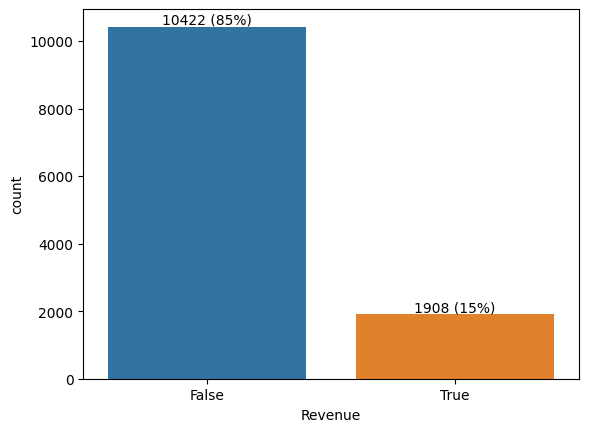

In [19]:
ax = sns.countplot(df['Revenue'])
abs_values = df['Revenue'].value_counts()
rel_values = df['Revenue'].value_counts(normalize = True).values *100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)

<Axes: xlabel='SpecialDay', ylabel='count'>

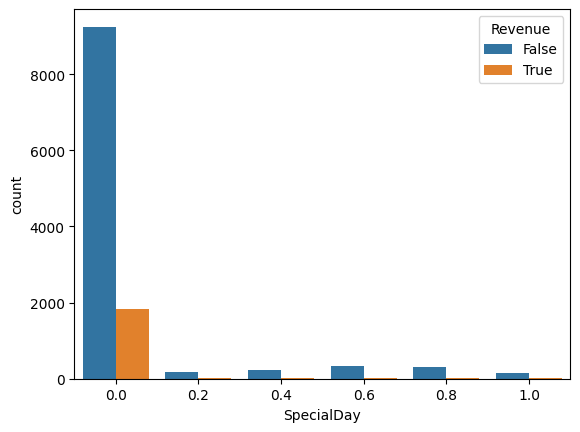

In [20]:
sns.countplot(df['SpecialDay'],hue = df['Revenue'])


Text(0.5, 1.0, 'Top 5 Bunce rates')

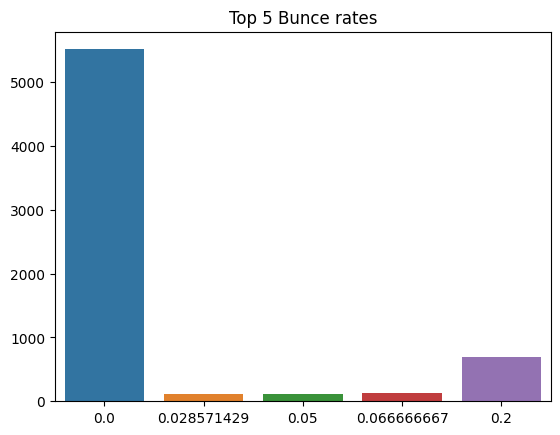

In [21]:
sns.barplot(x = df['BounceRates'].value_counts().index[:5],
            y = df['BounceRates'].value_counts().values[:5]
           )
plt.title('Top 5 Bunce rates')

<Axes: xlabel='Month', ylabel='count'>

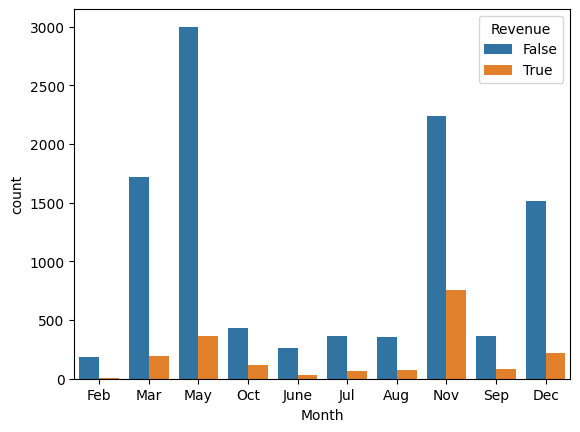

In [22]:
sns.countplot(df['Month'],hue = df['Revenue'])

<Axes: xlabel='VisitorType', ylabel='count'>

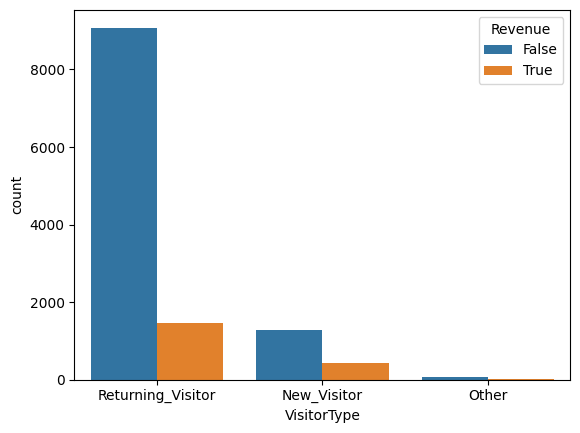

In [23]:
sns.countplot(df['VisitorType'],hue = df['Revenue'])

<Axes: xlabel='Weekend', ylabel='count'>

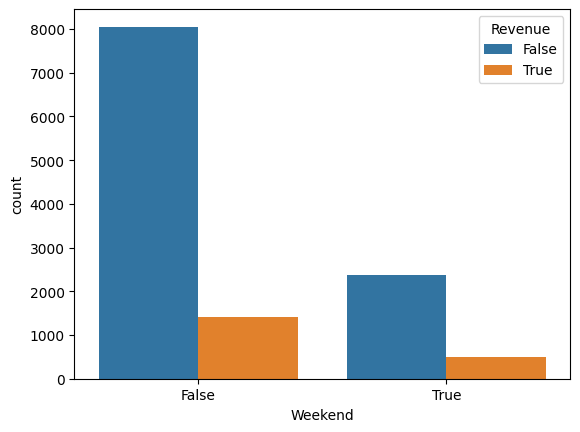

In [24]:
sns.countplot(df['Weekend'],hue = df['Revenue'])

Observations : 

1) Imbalanced Dataset - 85 % viitors results in no revenue and 15% of visitor results in revenue.

2) Special day have no major impact on the visiters

3) Most visitors switch website within 0.000 sec

4) Nov, May, have highest revenue

5) High Revenue genrator are from Returning visitor 

6) Most visitors vist website on weekdays but Weekend Revenues are higher.


<Axes: >

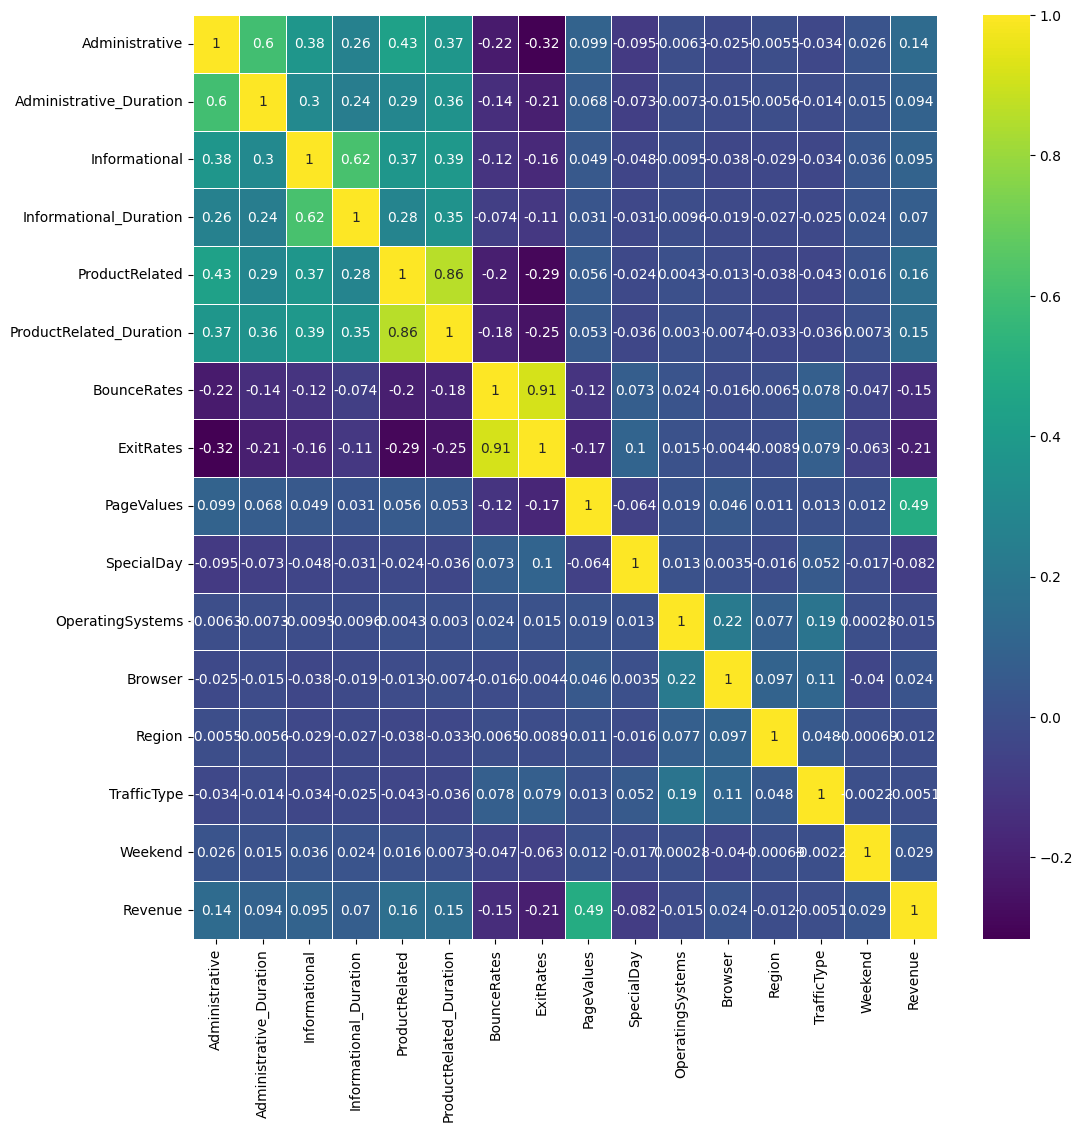

In [25]:
# Correlation between features

plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,cmap='viridis',linewidths=.5)

In [28]:
# Correlation between Target variables 

chi_sqr = pd.crosstab(index = df['Revenue'],columns = df['Weekend'])

stat, p, dof, expected = chi2_contingency(chi_sqr)

print("p value is " + str(p))

alpha = 0.05

if p <= alpha:
    print('There is a relation between the variables. ')
else:
    print('There is no relation between the variables. ')

p value is 0.0012663251061221968
There is a relation between the variables. 


In [29]:
# typecasting target variables

df['Weekend'] = df['Weekend'].astype(str)
df['Revenue'] = df['Revenue'].astype(str)

In [30]:
# numerical and categorical features

numerical_features =[i  for i in df.columns if df[i].dtype != 'O' and i not in ['Informational_Duration','Revenue','Weekend']]

categorical_features = [i  for i in df.columns if df[i].dtype == 'O' ]

In [31]:
numerical_features

['Administrative',
 'Administrative_Duration',
 'Informational',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType']

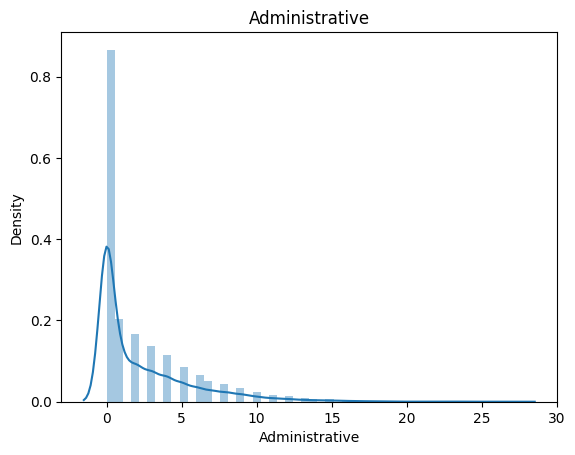

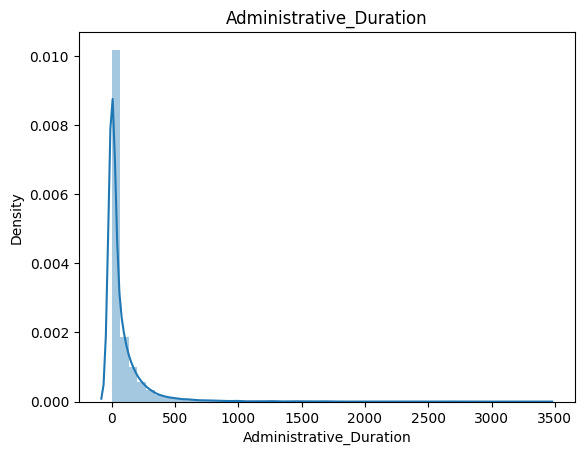

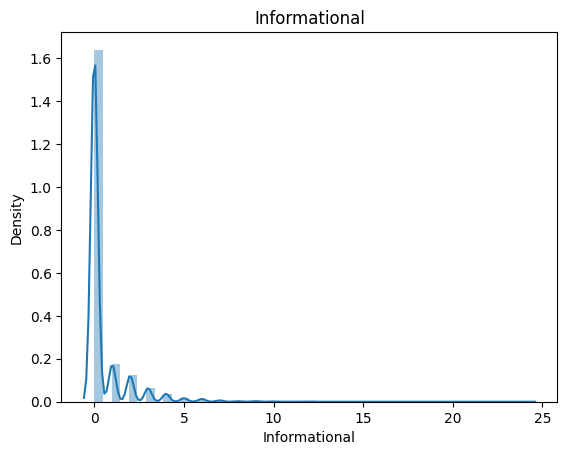

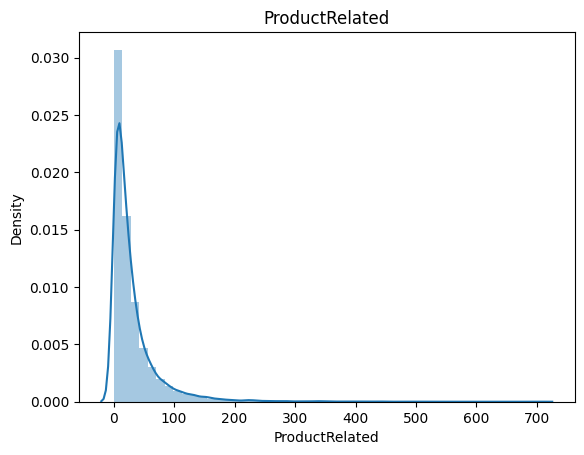

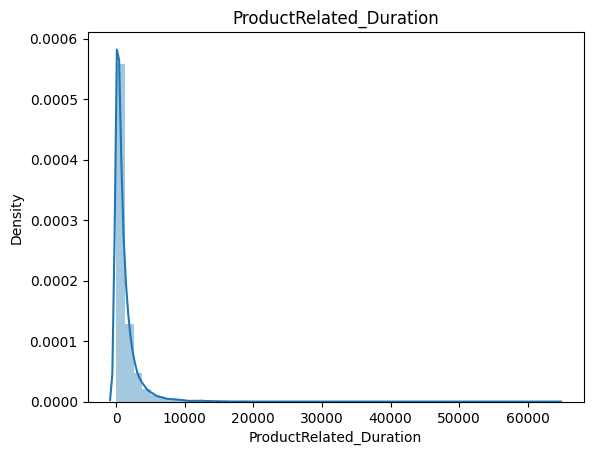

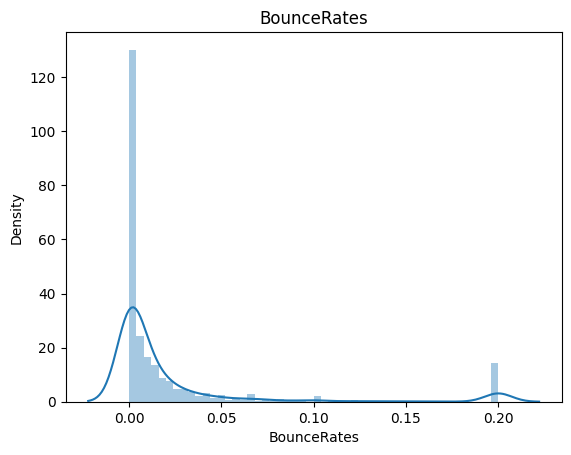

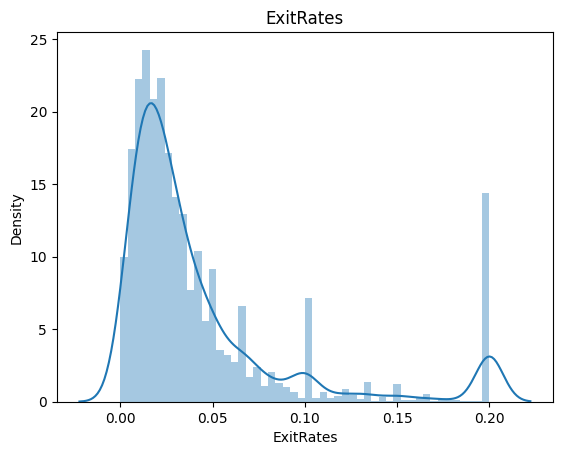

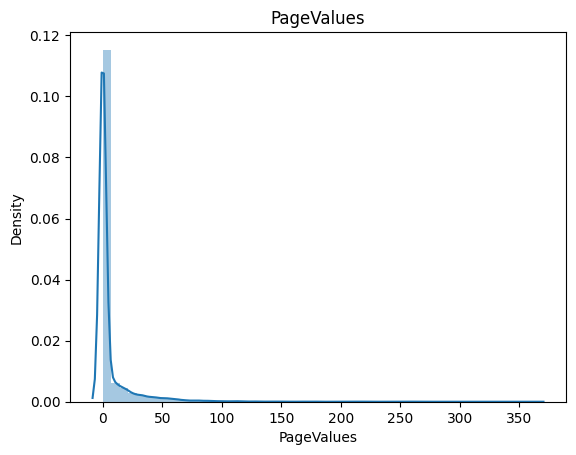

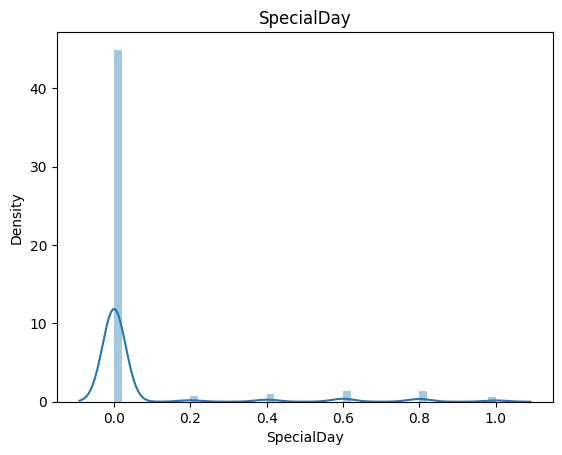

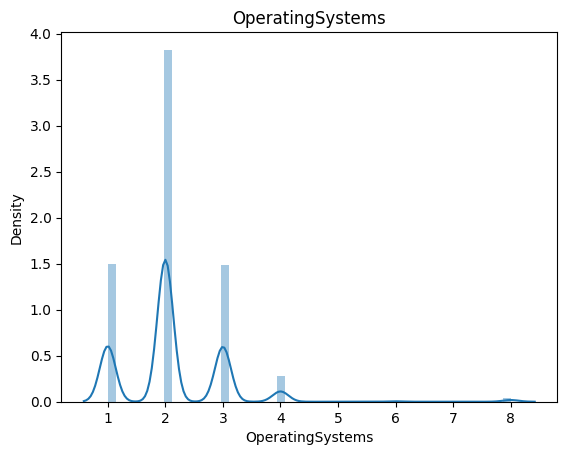

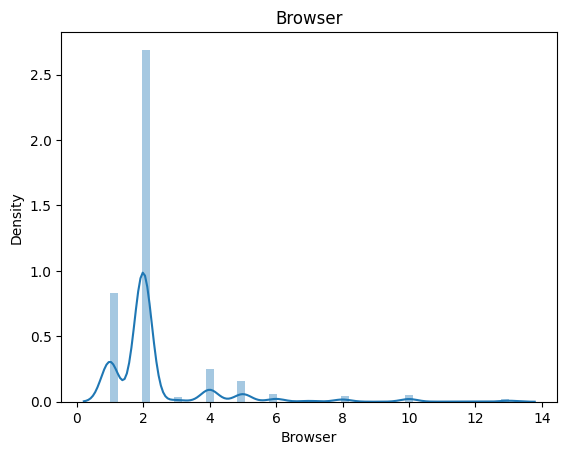

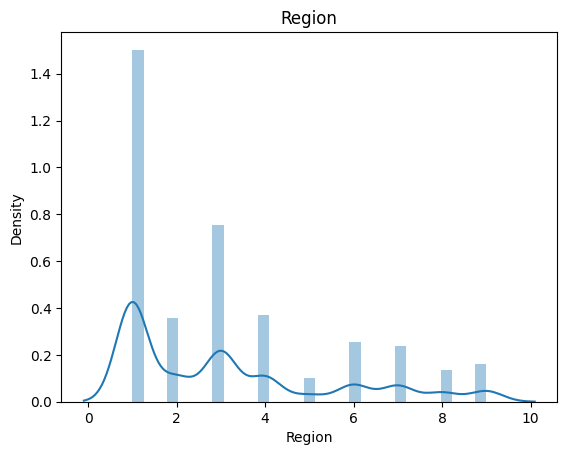

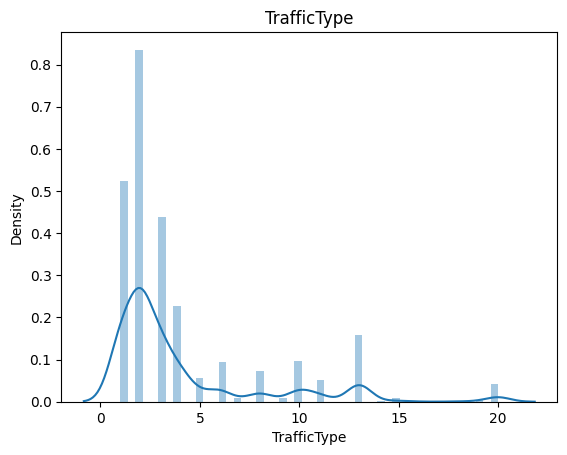

In [32]:
# distribution of numerical features 

for i in numerical_features:
    sns.distplot(df[i])
    plt.title(i)
    plt.show()

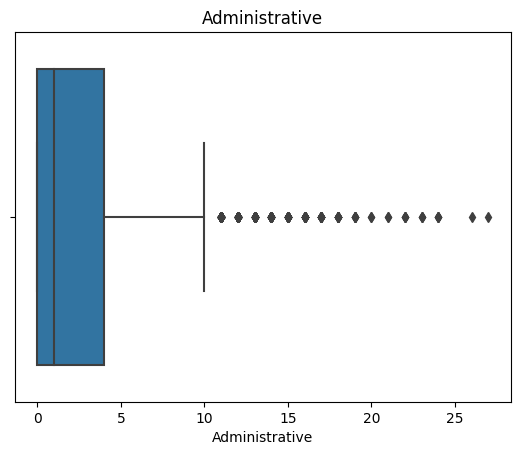

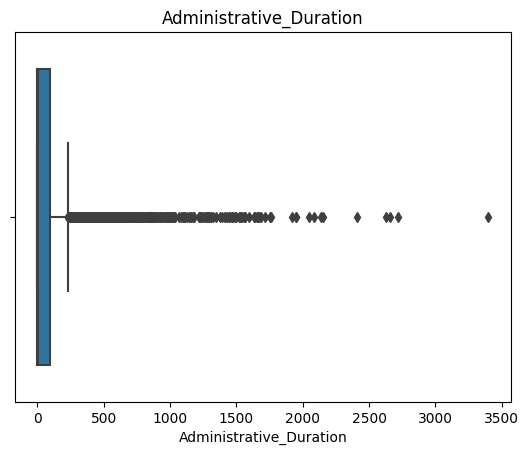

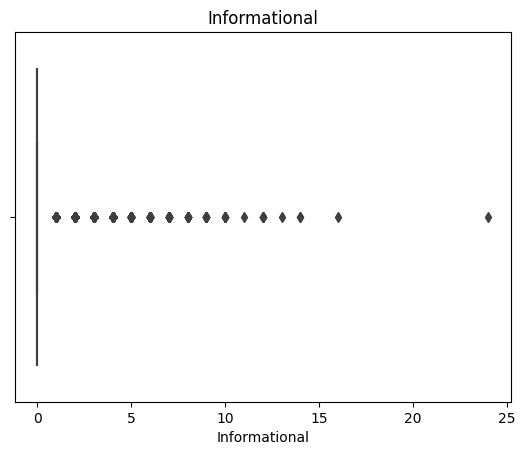

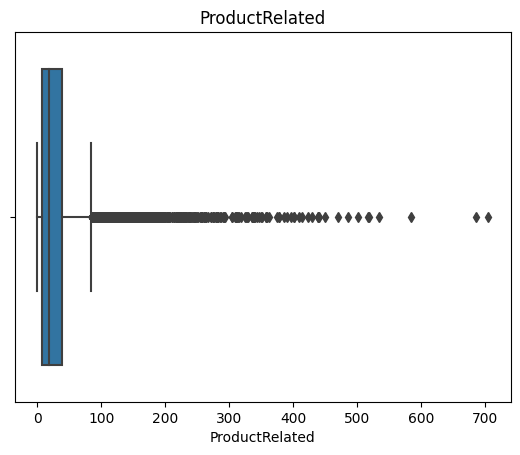

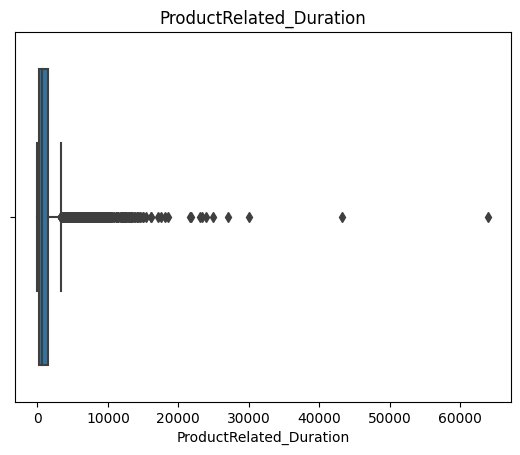

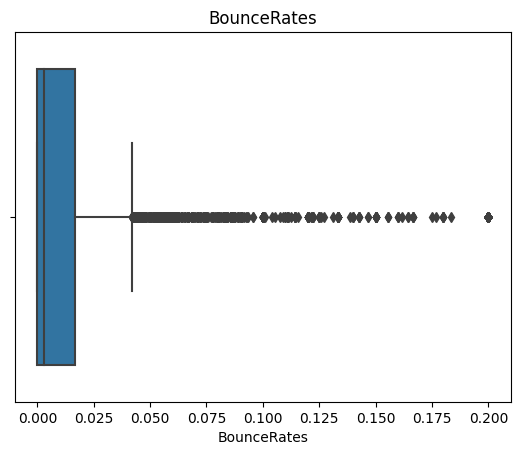

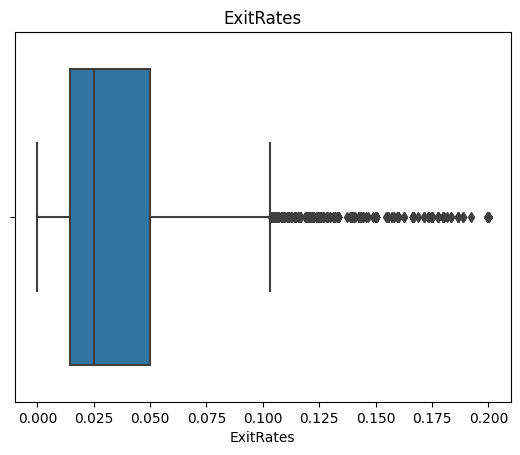

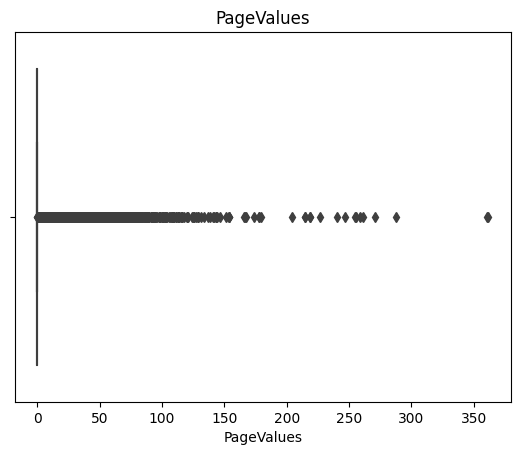

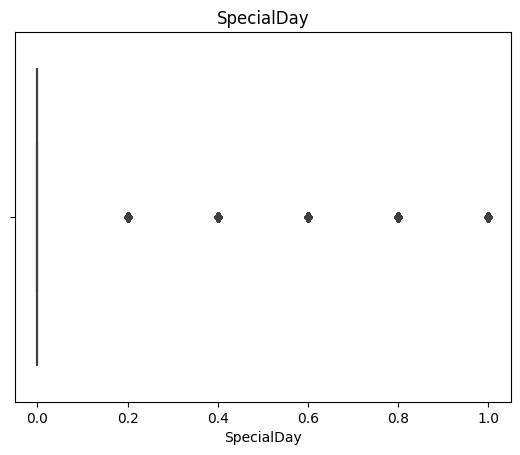

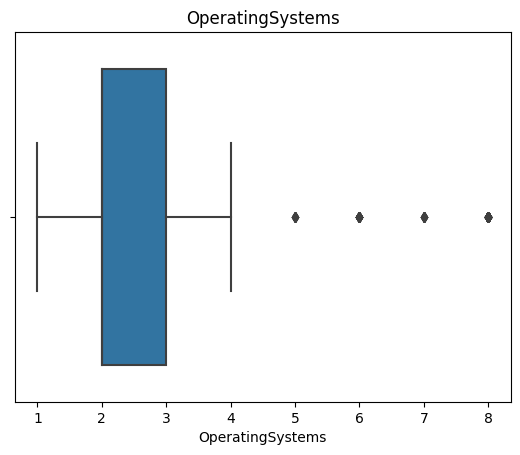

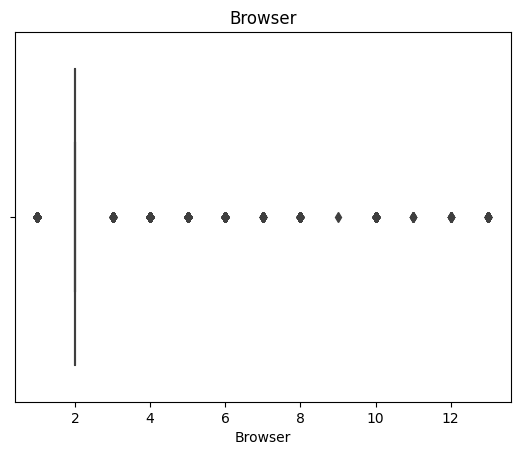

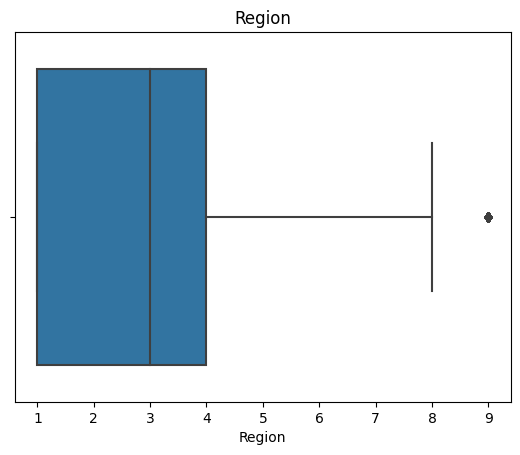

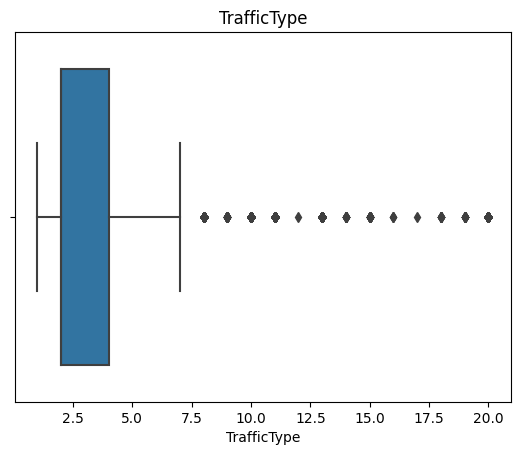

In [648]:
# Detecting outliers

for i in numerical_features:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

In [33]:
# Outliers count 

for i in numerical_features:
    per_75 = df[i].quantile(0.75)
    per_25 = df[i].quantile(0.25)
    iqr = per_75 - per_25
    
    upper_limit = per_75 + 1.5 *(iqr)
    lower_limit = per_25 + 1.5*(iqr)
    
    outlier = len(df) - len(df[(df[i]>upper_limit) | (df[i] < lower_limit)]) 
    
    print(f"{i} has {round((outlier/len(df))*100,3)}% of outliers")


Administrative has 11.638% of outliers
Administrative_Duration has 8.2% of outliers
Informational has 78.662% of outliers
ProductRelated has 8.135% of outliers
ProductRelated_Duration has 8.2% of outliers
BounceRates has 5.904% of outliers
ExitRates has 7.007% of outliers
PageValues has 77.859% of outliers
SpecialDay has 89.854% of outliers
OperatingSystems has 3.877% of outliers
Browser has 64.566% of outliers
Region has 16.221% of outliers
TrafficType has 6.034% of outliers


In [34]:
# Performing log transform

for i in numerical_features:
    df[i] = np.log(df[i]+1)

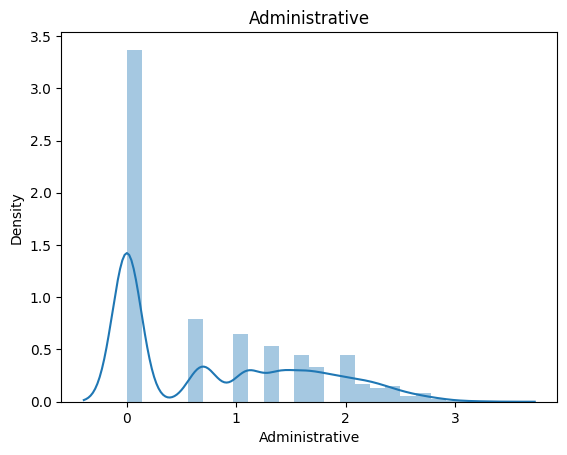

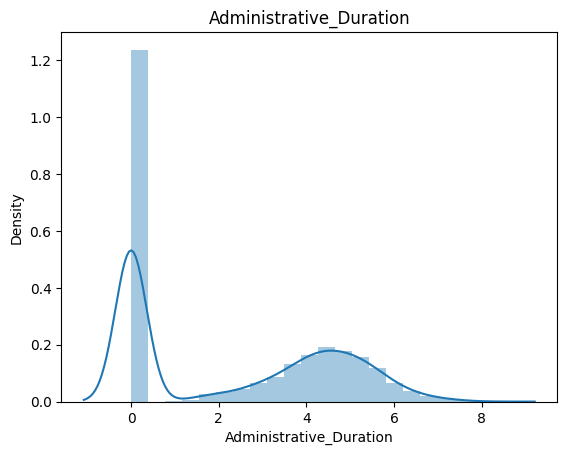

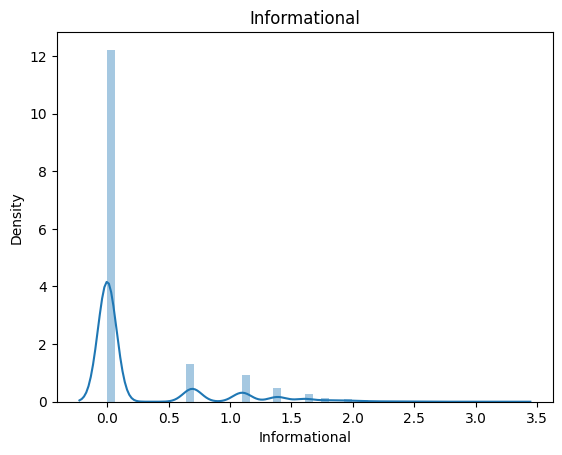

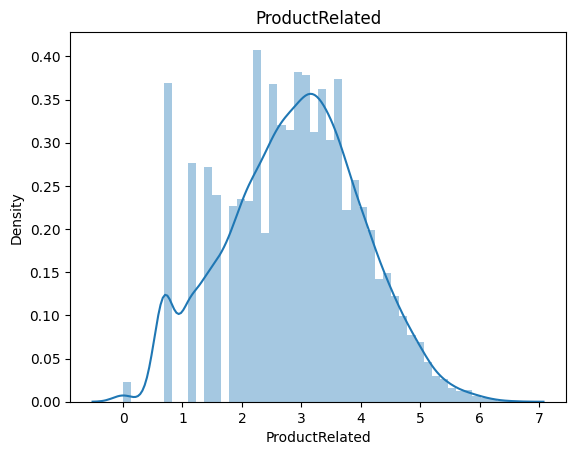

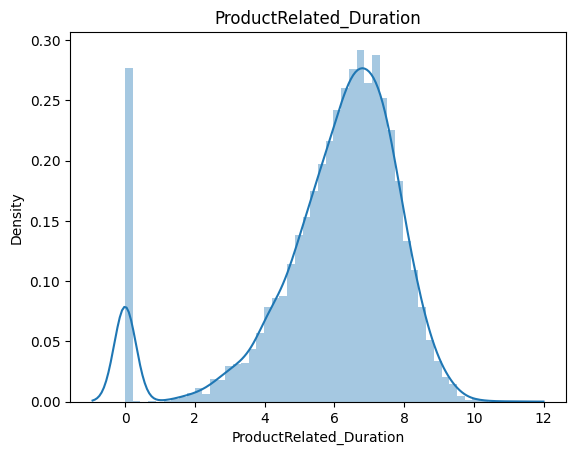

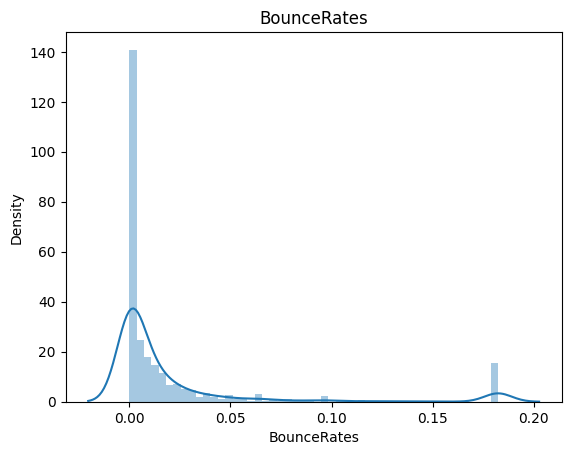

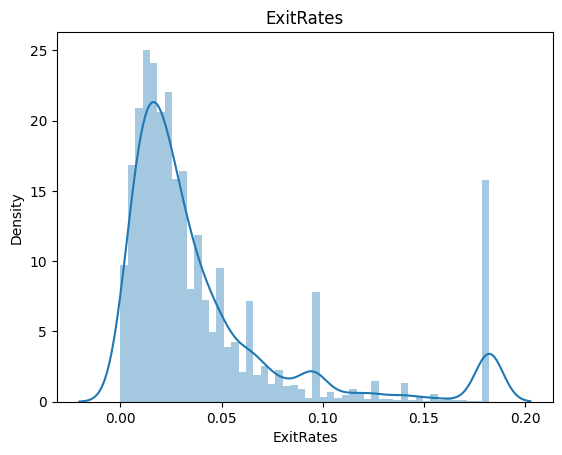

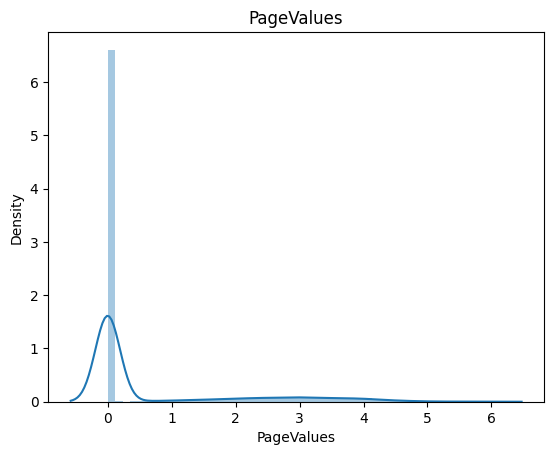

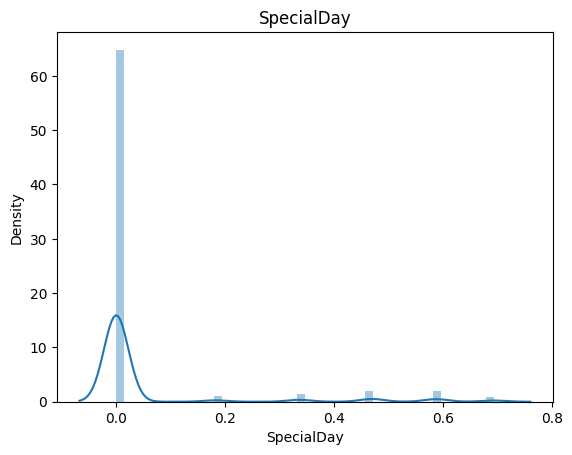

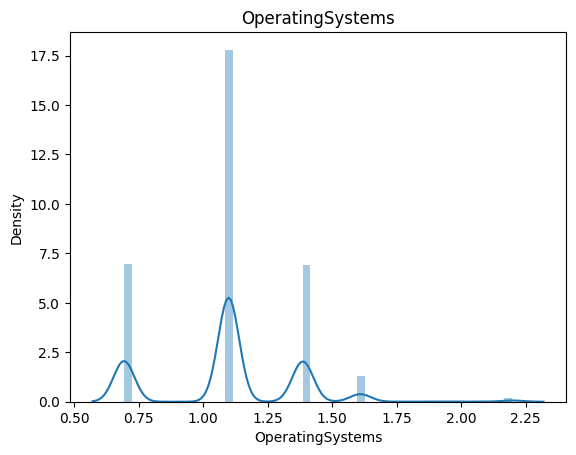

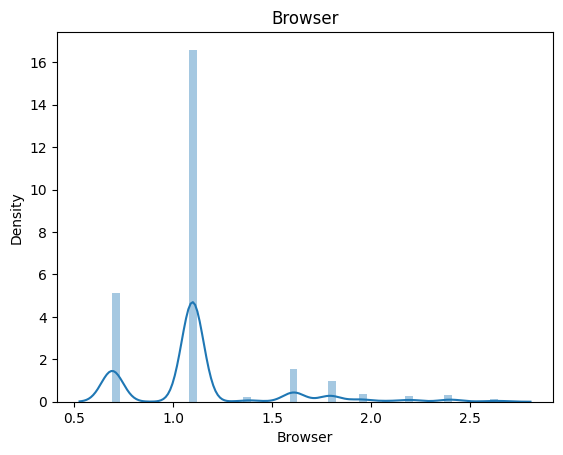

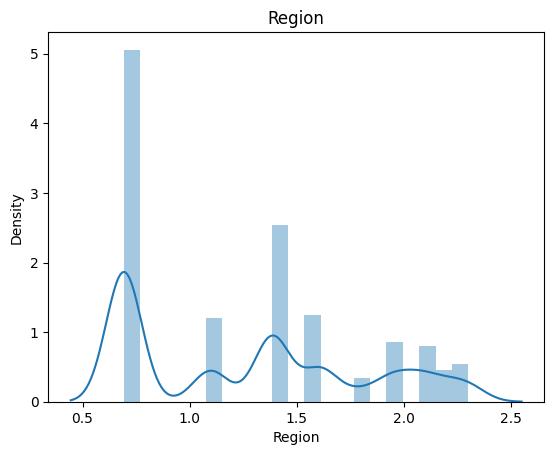

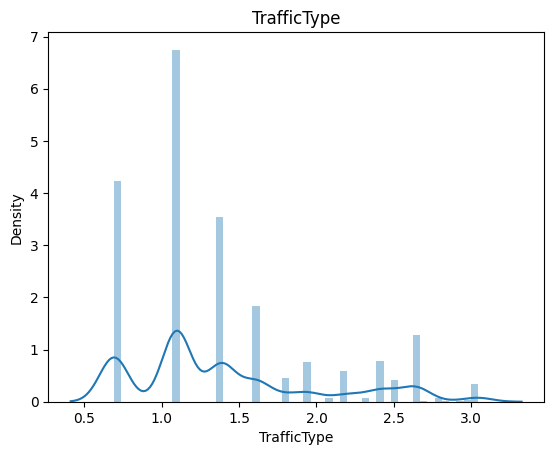

In [35]:
# distribution of numerical features 

for i in numerical_features:
    sns.distplot(df[i])
    plt.title(i)
    plt.show()

In [36]:
# Outliers count 

for i in numerical_features:
    per_75 = df[i].quantile(0.75)
    per_25 = df[i].quantile(0.25)
    iqr = per_75 - per_25
    
    upper_limit = per_75 + 1.5 *(iqr)
    lower_limit = per_25 + 1.5*(iqr)
    
    outlier = len(df) - len(df[(df[i]>upper_limit) | (df[i] < lower_limit)]) 
    
    print(f"{i} has {round((outlier/len(df))*100,3)}% of outliers")

Administrative has 3.277% of outliers
Administrative_Duration has 0.835% of outliers
Informational has 78.662% of outliers
ProductRelated has 7.656% of outliers
ProductRelated_Duration has 5.466% of outliers
BounceRates has 5.969% of outliers
ExitRates has 6.991% of outliers
PageValues has 77.859% of outliers
SpecialDay has 89.854% of outliers
OperatingSystems has 3.925% of outliers
Browser has 64.566% of outliers
Region has 13.836% of outliers
TrafficType has 7.048% of outliers


In [609]:
# Dependent and Independent Features -- Target as weekend and revenue

X = df.drop(['Weekend','Revenue'],axis = 1)
y = df[['Weekend','Revenue']]

In [525]:
# Train Test Split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [526]:
# Label Encoder 

label_encoder = preprocessing.LabelEncoder()

for i in categorical_features:
    if i in ['Month', 'VisitorType']:
        X_train[i] = label_encoder.fit_transform(X_train[i])
        X_test[i] = label_encoder.transform(X_test[i])
    if i in ['Weekend', 'Revenue']:
        y_train[i] = label_encoder.fit_transform(y_train[i])
        y_test[i] = label_encoder.transform(y_test[i])

        


In [414]:
# Standardization

scalar = preprocessing.StandardScaler()

for i in df:
    if i not in ['Weekend', 'Revenue']:
        train_feature = np.array(X_train[i]).reshape(-1,1)
        test_feature = np.array(X_test[i]).reshape(-1,1)
        
        train_feature_scaled = scalar.fit_transform(train_feature)
        test_feature_scaled = scalar.transform(test_feature)
        
        X_train[i] = train_feature_scaled.reshape(-1)
        X_test[i] = test_feature_scaled.reshape(-1)
        
    if i in ['Weekend', 'Revenue']:
        train_feature = np.array(y_train[i]).reshape(-1,1)
        test_feature = np.array(y_test[i]).reshape(-1,1)
        
        y_train[i] = label_encoder.fit_transform(y_train[i])
        y_test[i] = label_encoder.transform(y_test[i])


In [339]:
# model training

# Model training 

models = {"Random Forest": RandomForestClassifier(),
          "Gradient Boosting": GradientBoostingClassifier(),
          "AdaBoost classifier": AdaBoostClassifier(),
          "Xg boost": XGBClassifier()
            }


params= {"Random Forest":{
            'n_estimators': [100],
            'min_samples_split':[2,4],
            'random_state':[42],
            'class_weight':['balanced_subsample']
            
        },
    
        "Gradient Boosting":{
            'learning_rate':[0.1,0.01,0.001],
             'n_estimators':[100,125,143],
             'min_samples_split':[2,4],
             'random_state':[42]
        },
        
        "AdaBoost classifier":{
            'learning_rate':[0.1,0.01,0.001],
             'n_estimators':[100,125,150],
             'random_state':[42]
        },
    
        "Xg boost":{
            'learning_rate':[0.1,0.01,0.001],
             'n_estimators':[100,125,143],
             'max_depth' : [4,6],
             'random_state':[42],
             'scale_pos_weight': [100]
            
        }

       }
    


In [359]:
# Model building

logging.basicConfig(filename="log_file.log",level=logging.INFO,format='%(asctime)s %(levelname)s %(message)s')


class model_training:
    
    def __init__(self,X_train,X_test,y_train,y_test,models,param_grid):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.models = models
        self.param_grid = param_grid

    def eval_model(self):
    

        report = {}
        classificationreport = {}
        final_model = {}
        confusionmatrix = {}


        for i in models:

            cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

            mo_dels = GridSearchCV(models[i],cv = cv, param_grid = params[i])

            model = MultiOutputClassifier(mo_dels)

            model.fit(X_train,y_train)

            y_train_pred = model.predict(X_train)

            y_test_pred = model.predict(X_test)

            # Test and train scores

            train_model_score = accuracy_score(y_train,y_train_pred)

            test_model_score = accuracy_score(y_test,y_test_pred)

            classificationreport[i] = classification_report(y_test,y_test_pred)

            precision = precision_score(y_test,y_test_pred,average = 'weighted')

            recall = recall_score(y_test,y_test_pred,average = 'weighted')

            f1score = f1_score(y_test,y_test_pred,average = 'weighted')

            confusionmatrix[i] = confusion_matrix(y_test.values.argmax(axis=1),y_test_pred.argmax(axis=1))

            report[i] = {'accuray_score':test_model_score,
                         'precision':precision,
                         'recall':recall,
                         'f1score':f1score}

            final_model[i] = model

            logging.info('Model training completed')

        return report,classificationreport,final_model,confusionmatrix




    
    
    def save_model(self,file_name,model_config):
        try:
            with open(file_name, "wb") as file_obj:
                pickle.dump(model_config,file_obj)
                
                logging.info('File Saved')
                
        except Exception as e:
            logging.error("Exception occurred", traceback.format_exc())
            
            


In [360]:
# Model Training

model_trained = model_training(X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,
                                             models=models,param_grid = params)

report,classificationreport,final_model,confusionmatrix = model_trained.eval_model()

In [367]:
scores = pd.DataFrame.from_dict(report, orient='index')

model_score = scores[scores['accuray_score'] == max(scores['accuray_score'])].values[0][0]

best_model = scores[scores['accuray_score'] == max(scores['accuray_score'])].index[0]

model_config = final_model[best_model]

classifcation_report = classificationreport[best_model]

confusion_matrix = confusionmatrix[best_model]


# Saving the model as pickle file 

model_trained.save_model('model.pickle',model_config)

In [369]:
print(best_model)
print(model_score)

Gradient Boosting
0.6988375236550419


Gradient Boosting has the highest model score of 69.88%

In [256]:
# Dependent and Independent Features -- Information Duration

X = df.drop(['Informational_Duration'],axis = 1)
y = df['Informational_Duration']

In [257]:
# Train Test Split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.15, random_state=42)


# Label Encoder 

label_encoder = preprocessing.LabelEncoder()

for i in categorical_features:
    X_train[i] = label_encoder.fit_transform(X_train[i])
    X_test[i] = label_encoder.transform(X_test[i])
    
    

# Standardization

scalar = preprocessing.StandardScaler()

for i in X[numerical_features]:
    train_feature = np.array(X_train[i]).reshape(-1,1)
    test_feature = np.array(X_test[i]).reshape(-1,1)
    
    train_feature_scaled = scalar.fit_transform(train_feature)
    test_feature_scaled = scalar.transform(test_feature)
    
    X_train[i] = train_feature_scaled.reshape(-1)
    X_test[i] = test_feature_scaled.reshape(-1)
    
    
for i in X[categorical_features]:
    train_feature = np.array(X_train[i]).reshape(-1,1)
    test_feature = np.array(X_test[i]).reshape(-1,1)
    
    train_feature_scaled = scalar.fit_transform(train_feature)
    test_feature_scaled = scalar.transform(test_feature)
    
    X_train[i] = train_feature_scaled.reshape(-1)
    X_test[i] = test_feature_scaled.reshape(-1)
    

train_feature = np.array(y_train).reshape(-1,1)
test_feature = np.array(y_test).reshape(-1,1)

train_feature_scaled = scalar.fit_transform(train_feature)
test_feature_scaled = scalar.transform(test_feature)

y_train = train_feature_scaled.reshape(-1)
y_test = test_feature_scaled.reshape(-1)

In [286]:
# Model training for Informational_Duration


models = { "Decision Tree": DecisionTreeRegressor(),
          "Random Forest": RandomForestRegressor(),
          "Gradient Boosting": GradientBoostingRegressor(),
          "AdaBoost Regressor": AdaBoostRegressor(),
          "Xg boost": XGBRegressor() 
            }


params={"Decision Tree": 
        {
        # "criterion":['squared_error','friedman_mse','absolute_error'],
        'random_state':[42]
        },
        
        "Random Forest":
        {
        'n_estimators':[100,123],
        'random_state':[42]
        },
        
        "Gradient Boosting":
        {
        'learning_rate':[0.04,0.05,0.09,0.004],
        'n_estimators':[143,150,164,175],
        'random_state':[42]
        },
        
        "AdaBoost Regressor":
        {
        "n_estimators":[143,150,164,175],
        'learning_rate':[0.04,0.05,0.09,0.004],
        'random_state':[42]
        },
        "Xg boost":{
            'learning_rate':[0.04,0.05,0.09,0.004],
             'n_estimators':[143,150,164,175],
             'max_depth' : [4,6],
             'random_state':[42],
             'scale_pos_weight': [100]
        
       }
       }

In [287]:
# Model building

logging.basicConfig(filename="log_file.log",level=logging.INFO,format='%(asctime)s %(levelname)s %(message)s')


class model_training:
    
    def __init__(self,X_train,X_test,y_train,y_test,models,param_grid):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.models = models
        self.param_grid = param_grid

    def eval_model(self):
        
        try:
        
            report = {}

            model_config = {}

            for i in models:

                mo_dels = models[i]

                model = GridSearchCV(mo_dels,cv = 2, param_grid = params[i])

                model.fit(X_train,y_train)

                y_train_pred = model.predict(X_train)

                y_test_pred = model.predict(X_test)

                train_model_score = r2_score(y_train,y_train_pred)

                test_model_score = r2_score(y_test,y_test_pred)
                
                report[i] = test_model_score
 
                model_config[i] = model
                
                logging.info('Model training completed')

            return report,model_config
        
        except Exception as e:
            logging.error("Exception occurred", traceback.format_exc())
    
    
    def save_model(self,file_name,model_config):
        try:
            with open(file_name, "wb") as file_obj:
                pickle.dump(model_config,file_obj)
                
                logging.info('File Saved')
                
        except Exception as e:
            logging.error("Exception occurred", traceback.format_exc())

In [288]:
# Model Training

model_trained = model_training(X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,
                                             models=models,param_grid = params)

report,final_model = model_trained.eval_model()

# model_trained.save_model('model.pickle',best_model_config)

In [292]:
scores = pd.DataFrame.from_dict(report, orient='index')

model_score = scores[scores[0] == max(scores[0])].values[0][0]

best_model = scores[scores[0] == max(scores[0])].index[0]

model_config = final_model[best_model]


In [296]:
print(best_model)
print(model_score)

Xg boost
0.40917538172856316
